In [1]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
import pyspark.sql.functions as F
from pyspark.sql.window import Window
import matplotlib.pyplot as plt

In [2]:
import os
pwd = os.getcwd()
exploration_abs_path = f"{pwd}/exploration.ipynb"
exploration_abs_path

'/mnt/c/Users/adrie/OneDrive/Documents/EPITA/ING2/S8/BigData/project/exploration.ipynb'

In [3]:
%run {pwd + "/exploration.ipynb"}

22/06/21 17:43:48 WARN Utils: Your hostname, Dell-XPS resolves to a loopback address: 127.0.1.1; using 172.24.3.238 instead (on interface eth0)
22/06/21 17:43:48 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/06/21 17:43:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable



AMAZON.csv:
Dataframe schema:
root
 |-- Date: timestamp (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- company_name: string (nullable = true)

First 40 lines:
+-------------------+-----------------+-----------------+-----------------+-----------------+---------+-----------------+------------+
|               Date|             High|              Low|             Open|            Close|   Volume|        Adj Close|company_name|
+-------------------+-----------------+-----------------+-----------------+-----------------+---------+-----------------+------------+
|2017-01-03 00:00:00| 758.760009765625|747.7000122070312|757.9199829101562|753.6699829101562|3521100.0|753.6699829101562|      AMAZON|
|2017-01-04 00:00:00|759.6799926757812|754.2000122070312|758.3900146484375|757.1799926757812|2510500.

22/06/21 17:43:59 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
22/06/21 17:43:59 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
/home/adrien/.local/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


DenseMatrix([[1.        , 0.99919608, 0.99952481, 0.99943308, 0.16053643,
              0.99943308],
             [0.99919608, 1.        , 0.99934439, 0.99947694, 0.13293678,
              0.99947694],
             [0.99952481, 0.99934439, 1.        , 0.99885254, 0.14904749,
              0.99885254],
             [0.99943308, 0.99947694, 0.99885254, 1.        , 0.14617949,
              1.        ],
             [0.16053643, 0.13293678, 0.14904749, 0.14617949, 1.        ,
              0.14617949],
             [0.99943308, 0.99947694, 0.99885254, 1.        , 0.14617949,
              1.        ]]) 

RSI
Moving Average
+-------------------+-----------------+-----------------+-----------------+-----------------+---------+-----------------+------------+-------------+
|               Date|             High|              Low|             Open|            Close|   Volume|        Adj Close|company_name|daily_average|
+-------------------+-----------------+-----------------+-----------------

0.020751345210517542
IMI score
+-------------------+-----------------+-----------------+-----------------+-----------------+---------+-----------------+------------+-----------------+------------------+---------+---------+-----------------+----------------+-----------------+-----------------+-----------------+
|               Date|             High|              Low|             Open|            Close|   Volume|        Adj Close|company_name|       daily_gain|        daily_loss|gain_bool|loss_bool|         net_gain|        net_loss|           mgains|          mlosses|              imi|
+-------------------+-----------------+-----------------+-----------------+-----------------+---------+-----------------+------------+-----------------+------------------+---------+---------+-----------------+----------------+-----------------+-----------------+-----------------+
|2017-01-03 00:00:00| 758.760009765625|747.7000122070312|757.9199829101562|753.6699829101562|3521100.0|753.6699829101562|     

1.449290060851927
+-------+------------------+------------------+------------------+------------------+--------------------+------------------+------------+
|summary|              High|               Low|              Open|             Close|              Volume|         Adj Close|company_name|
+-------+------------------+------------------+------------------+------------------+--------------------+------------------+------------+
|  count|               987|               987|               987|               987|                 987|               987|         987|
|   mean|57.322335375599344| 56.08516212123264| 56.68830042165584|56.735163877075564|1.2677001693920973E8|  55.3555844972682|        null|
| stddev|23.909537521895153| 23.04004228077875| 23.50911719644306|23.487454843800442| 6.043945164169236E7| 24.00281865091007|        null|
|    min|29.082500457763672|28.690000534057617|28.950000762939453|  29.0049991607666|           2.01978E7|27.247108459472656|       APPLE|
|    max|

-0.06419847183734695
IMI score
+-------------------+------------------+------------------+------------------+------------------+----------+------------------+------------+--------------------+--------------------+---------+---------+--------------------+--------------------+-------------------+--------------------+-----------------+
|               Date|              High|               Low|              Open|             Close|    Volume|         Adj Close|company_name|          daily_gain|          daily_loss|gain_bool|loss_bool|            net_gain|            net_loss|             mgains|             mlosses|              imi|
+-------------------+------------------+------------------+------------------+------------------+----------+------------------+------------+--------------------+--------------------+---------+---------+--------------------+--------------------+-------------------+--------------------+-----------------+
|2017-01-03 00:00:00|29.082500457763672|28.69000053405761

1.449290060851927
+-------+------------------+------------------+------------------+------------------+--------------------+------------------+------------+
|summary|              High|               Low|              Open|             Close|              Volume|         Adj Close|company_name|
+-------+------------------+------------------+------------------+------------------+--------------------+------------------+------------+
|  count|               987|               987|               987|               987|                 987|               987|         987|
|   mean| 186.3984500224105| 182.0770063931698|184.23939196461964|184.34894618968713|2.0852387126646403E7|184.34894618968713|        null|
| stddev|37.254783636139116| 35.96107958363421| 36.62328370702378| 36.62017415511841|1.3239300733826615E7| 36.62017415511841|        null|
|    min|117.83999633789062|115.51000213623047|116.02999877929688|116.86000061035156|           4113594.0|116.86000061035156|    FACEBOOK|
|    max|

0.04580538200010804
IMI score
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+------------+--------------------+-------------------+---------+---------+------------------+-------------------+------------------+------------------+-----------------+
|               Date|              High|               Low|              Open|             Close|   Volume|         Adj Close|company_name|          daily_gain|         daily_loss|gain_bool|loss_bool|          net_gain|           net_loss|            mgains|           mlosses|              imi|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+------------+--------------------+-------------------+---------+---------+------------------+-------------------+------------------+------------------+-----------------+
|2017-01-03 00:00:00|117.83999633789062|115.51000213623047|116.02999877929688|116.

1.449290060851927
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------+
|summary|              High|               Low|              Open|             Close|            Volume|         Adj Close|company_name|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------+
|  count|               987|               987|               987|               987|               987|               987|         987|
|   mean|1175.6790605137292|1152.9178970166856|1163.8854444324065|1164.8144006854736|1634631.7335359675|1164.8144006854736|        null|
| stddev| 218.8235632110295| 212.2207173542823|214.97779187990264|215.44599608390612| 716425.6760312195|215.44599608390612|        null|
|    min| 789.6300048828125| 775.7999877929688| 778.8099975585938| 786.1400146484375|          285821.0| 786.1400146484375|      GOOGLE|
|    max|1824.829956054

+-------------------+-----------------+-----------------+-----------------+-----------------+---------+-----------------+------------+-----------------+------------------+---------+---------+-----------------+----------------+-----------------+-----------------+------------------+
|               Date|             High|              Low|             Open|            Close|   Volume|        Adj Close|company_name|       daily_gain|        daily_loss|gain_bool|loss_bool|         net_gain|        net_loss|           mgains|          mlosses|               imi|
+-------------------+-----------------+-----------------+-----------------+-----------------+---------+-----------------+------------+-----------------+------------------+---------+---------+-----------------+----------------+-----------------+-----------------+------------------+
|2017-01-03 00:00:00|789.6300048828125|775.7999877929688|778.8099975585938|786.1400146484375|1657300.0|786.1400146484375|      GOOGLE| 7.33001708984375| -

1.449290060851927
+-------+------------------+------------------+------------------+------------------+--------------------+------------------+------------+
|summary|              High|               Low|              Open|             Close|              Volume|         Adj Close|company_name|
+-------+------------------+------------------+------------------+------------------+--------------------+------------------+------------+
|  count|               987|               987|               987|               987|                 987|               987|         987|
|   mean|123.52858665334901|121.02308006634466|122.32611970601957|122.34503256924367|2.9104952561296858E7|119.77032003045203|        null|
| stddev| 46.40416482581066|45.038031013567725| 45.73307377448831| 45.74600811823214|1.3627194702253582E7| 46.76978863281242|        null|
|    min| 62.65999984741211| 61.95000076293945|62.189998626708984| 62.29999923706055|           6486678.0| 58.41072463989258|   MICROSOFT|
|    max|

+-------------------+------------------+------------------+------------------+------------------+---------+------------------+------------+--------------------+--------------------+---------+---------+-------------------+-------------------+------------------+-------------------+------------------+
|               Date|              High|               Low|              Open|             Close|   Volume|         Adj Close|company_name|          daily_gain|          daily_loss|gain_bool|loss_bool|           net_gain|           net_loss|            mgains|            mlosses|               imi|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+------------+--------------------+--------------------+---------+---------+-------------------+-------------------+------------------+-------------------+------------------+
|2017-01-03 00:00:00| 62.84000015258789|62.130001068115234|62.790000915527344| 62.58000183105469|2.0

Dataframe schema:
root
 |-- Date: timestamp (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- company_name: string (nullable = true)

First 40 lines:
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+------------+
|               Date|              High|               Low|              Open|             Close|   Volume|         Adj Close|company_name|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+------------+
|2017-01-03 00:00:00|44.066001892089844| 42.19200134277344| 42.97200012207031| 43.39799880981445|2.96165E7| 43.39799880981445|       TESLA|
|2017-01-04 00:00:00|45.599998474121094| 42.86199951171875| 42.95000076293945| 45.397998809814

+--------------------------+
|stddev_samp(daily_average)|
+--------------------------+
|                      null|
+--------------------------+

average opening from 2019-04-18 00:00:00 to 2019-05-16 00:00:00
+-----------------+
|        avg(Open)|
+-----------------+
|49.27509994506836|
+-----------------+

average closing from 2019-04-18 00:00:00 to 2019-05-16 00:00:00
+-----------------+
|       avg(Close)|
+-----------------+
|49.02979965209961|
+-----------------+

daily return rate
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+------------+-------------------+
|               Date|              High|               Low|              Open|             Close|   Volume|         Adj Close|company_name|       daily_return|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+------------+-------------------+
|2017-01-03 00:00:00|44.06

+-------------------+------------------+------------------+------------------+------------------+---------+------------------+------------+------------------+--------------------+-----------+-----------+--------------------+--------------------+------------------+------------------+
|               Date|              High|               Low|              Open|             Close|   Volume|         Adj Close|company_name|     typical_price|      raw_money_flow|is_pos_flow|is_neg_flow|     pos_period_flow|     neg_period_flow|  money_flow_ratio|  money_flow_index|
+-------------------+------------------+------------------+------------------+------------------+---------+------------------+------------+------------------+--------------------+-----------+-----------+--------------------+--------------------+------------------+------------------+
|2017-01-03 00:00:00|44.066001892089844| 42.19200134277344| 42.97200012207031| 43.39799880981445|2.96165E7| 43.39799880981445|       TESLA|129.65600

1.448780487804878
+-------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------+
|summary|              High|               Low|             Open|             Close|           Volume|         Adj Close|company_name|
+-------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------+
|  count|               411|               411|              411|               411|              411|               411|         411|
|   mean|182.39606543585043|172.02370037069576|177.1945766625323|177.46828020750172|7060712.613138686|177.46828020750172|        null|
| stddev|142.85245242428914| 134.5095182837666|138.9019224307191|138.66359007242428|6905543.039975025|138.66359007242428|        null|
|    min|  63.7400016784668|59.939998626708984|             61.0|              62.0|         512600.0|              62.0|        ZOOM|
|    max| 588.8400268554688| 562.5499

0.2830769465519832
IMI score
+-------------------+-----------------+------------------+-----------------+-----------------+---------+-----------------+------------+-------------------+--------------------+---------+---------+-------------------+------------------+------------------+------------------+------------------+
|               Date|             High|               Low|             Open|            Close|   Volume|        Adj Close|company_name|         daily_gain|          daily_loss|gain_bool|loss_bool|           net_gain|          net_loss|            mgains|           mlosses|               imi|
+-------------------+-----------------+------------------+-----------------+-----------------+---------+-----------------+------------+-------------------+--------------------+---------+---------+-------------------+------------------+------------------+------------------+------------------+
|2019-04-18 00:00:00|             66.0| 60.32099914550781|             65.0|             62.

+-------------------+---------------------+
|               Date|upside_downside_ratio|
+-------------------+---------------------+
|2019-04-18 00:00:00|  -0.7217585360457196|
|2019-04-22 00:00:00|    8.141349354916516|
|2019-04-23 00:00:00|    2.309207224843595|
|2019-04-24 00:00:00|                  0.0|
|2019-04-25 00:00:00| -0.00235084785829...|
|2019-04-26 00:00:00|  -1.8171516673679644|
|2019-04-29 00:00:00|   -99.24135166296941|
|2019-04-30 00:00:00|  -0.3552328106783645|
|2019-05-01 00:00:00| -0.20444182849713102|
|2019-05-02 00:00:00| -0.06173066034477465|
|2019-05-03 00:00:00|    5.320607882765764|
|2019-05-06 00:00:00|    2.790689713061714|
|2019-05-07 00:00:00|                  0.0|
|2019-05-08 00:00:00|   -1.813917761346143|
|2019-05-09 00:00:00|   -28.52498062893144|
|2019-05-10 00:00:00|   -6.662061276165812|
|2019-05-13 00:00:00|                  0.0|
|2019-05-14 00:00:00|   -2.094947312883337|
|2019-05-15 00:00:00|    3.000886884719745|
|2019-05-16 00:00:00|    2.52715

In [4]:
spark = create_spark_session("Spark_Application_Name")

# load data
all_datasets = []
for f in ['AMAZON.csv', 'APPLE.csv', 'FACEBOOK.csv', 'GOOGLE.csv',
            'MICROSOFT.csv', 'TESLA.csv', 'ZOOM.csv']:
    print(f"{f}:")
    df = load_data(spark, 'stocks_data/' + f)
    all_datasets.append(df)

AMAZON.csv:
APPLE.csv:
FACEBOOK.csv:
GOOGLE.csv:
MICROSOFT.csv:
TESLA.csv:
ZOOM.csv:


Input:  
    - 4xHigh  
    - 4xOpen  
    - 4xClose  
    - 4xLow  
    - Volatilité  
    - Momentum  
    - IMI  
    - MFI  

In [5]:
# all the features given to the model
features = [
    "High", "High1", "High2", "High3",
    "Low", "Low1", "Low2", "Low3",
    "Open", "Open1", "Open2", "Open3",
    "Close", "Close1", "Close2", "Close3",
    "Momentum",
    "imi",
    "Volatility"
]

In [6]:
def generate_train_test_data(df):
    # create a window to get lagged columns
    win = Window.partitionBy('Year').orderBy('Date')

    # create lagged columns (High, Low, Open and Close offseted by up to four)
    df_with_lag = df.withColumn('Year', F.year('Date'))
    for i in range(1, 4):
        for s in ["High", "Low", "Open", "Close"]:
            df_with_lag = df_with_lag.withColumn(s + str(i), F.lag(F.col(s), i).over(win))
    
    s = 'Date'
    i = 3
    df_with_lag = df_with_lag.withColumn(s + str(i), F.lag(F.col(s), i).over(win))

    # Calculate volatility over the last four days
    tmp = df_with_lag.withColumn('Average_from_1_to_4', (F.col('Close') + F.col('Close1') + F.col('Close2') + F.col('Close3')) / 4)
    tmp = tmp.withColumn('Close_minus_mean_square', (F.col('Close') - F.col('Average_from_1_to_4'))**2)
    tmp = tmp.withColumn('Close1_minus_mean_square', (F.col('Close1') - F.col('Average_from_1_to_4'))**2)
    tmp = tmp.withColumn('Close2_minus_mean_square', (F.col('Close2') - F.col('Average_from_1_to_4'))**2)
    tmp = tmp.withColumn('Close3_minus_mean_square', (F.col('Close3') - F.col('Average_from_1_to_4'))**2)
    tmp = tmp.withColumn('mean_minus_square', (F.col('Close_minus_mean_square') + F.col('Close1_minus_mean_square') + F.col('Close2_minus_mean_square') + F.col('Close3_minus_mean_square')) / 4)
    tmp = tmp.withColumn('Volatility', F.sqrt('mean_minus_square'))

    df_with_volatility = tmp.select(df_with_lag.columns + ['Volatility'])

    # add momentum to the dataframe
    df_with_momentum = compute_momentum(df_with_volatility).withColumnRenamed('daily_average', 'Momentum')

    # add imi to the dataframe
    df_with_imi = compute_intraday_momentum_index(df_with_momentum).select(df_with_momentum.columns + ['imi'])

    # add mfi to the dataframe
    df_with_mfi = compute_money_flow_index(df_with_imi).select(df_with_imi.columns + ['money_flow_index'])

    # add label (the next Close value)
    df_labeled = df_with_mfi.withColumn('label', F.lag(F.col('Close'), -1).over(win))

    # drop columns containing null values
    final_df = df_labeled.select(features + ['Date', 'label']).fillna(0)
    # final_df.show()

    # split train and test data
    trainDF, testDF = final_df.randomSplit([.8, .2], seed=42)

    return trainDF, testDF

In [7]:
def test_model(model_type, trainDF, testDF):
    # vectorise features
    assembler = VectorAssembler(
        inputCols=features,
        outputCol="features"
    )

    # create model type
    lr = model_type

    # create the pipeline that will create the model
    pipeline = Pipeline(stages=[assembler, lr])

    # Fit the pipeline to training documents.
    model = pipeline.fit(trainDF)

    # test the model
    predDF = model.transform(testDF)

    return predDF

In [8]:
def create_chart(predDF):
    """
    Create a plot comparing the label and the prediction
    """
    predDF = predDF.orderBy('Date')
    expected = [val.label for val in predDF.select('label').collect()]
    output = [val.prediction for val in predDF.select('prediction').collect()]
    x = [val.Date for val in predDF.select('Date').collect()]

    plt.plot(x, expected, color='red')
    plt.plot(x, output, color='blue')

    plt.ylabel('Price')
    plt.xlabel('timestamp')
    plt.title('ASN values for time')
    plt.legend(['expected', 'output'], loc='upper left')

    plt.show()

22/06/21 17:44:18 WARN Instrumentation: [7559e145] regParam is zero, which might cause numerical instability and overfitting.
22/06/21 17:44:19 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
22/06/21 17:44:19 WARN Instrumentation: [7559e145] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.
22/06/21 17:44:19 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


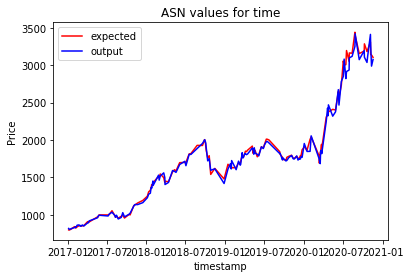

RMSE:  59.900856908204915
R2:  0.9917697789152804


22/06/21 17:44:22 WARN Instrumentation: [14b069a0] regParam is zero, which might cause numerical instability and overfitting.
22/06/21 17:44:22 WARN Instrumentation: [14b069a0] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


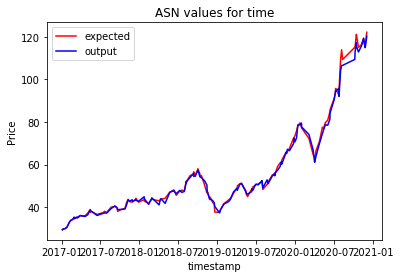

RMSE:  1.5255786985274988
R2:  0.9956252849854814


22/06/21 17:44:24 WARN Instrumentation: [bcbe2f4d] regParam is zero, which might cause numerical instability and overfitting.
22/06/21 17:44:24 WARN Instrumentation: [bcbe2f4d] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


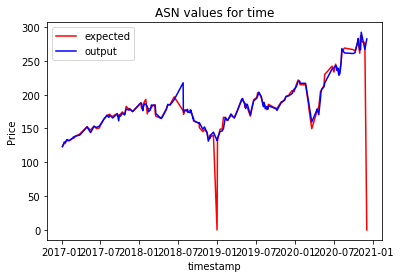

RMSE:  25.334925201702536
R2:  0.6084357674019054


22/06/21 17:44:27 WARN Instrumentation: [b330039c] regParam is zero, which might cause numerical instability and overfitting.
22/06/21 17:44:27 WARN Instrumentation: [b330039c] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


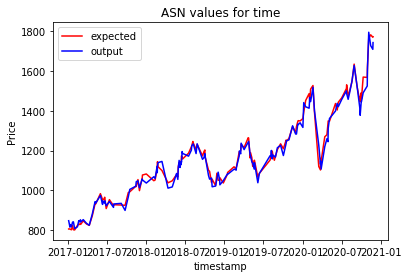

RMSE:  27.71006120131519
R2:  0.9841446493943872


22/06/21 17:44:29 WARN Instrumentation: [ba8188d2] regParam is zero, which might cause numerical instability and overfitting.
22/06/21 17:44:29 WARN Instrumentation: [ba8188d2] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


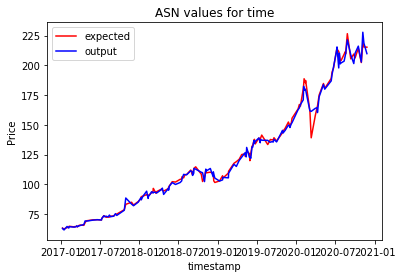

RMSE:  3.4131290236468224
R2:  0.9944124912230322


22/06/21 17:44:31 WARN Instrumentation: [dd488c3d] regParam is zero, which might cause numerical instability and overfitting.
22/06/21 17:44:31 WARN Instrumentation: [dd488c3d] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


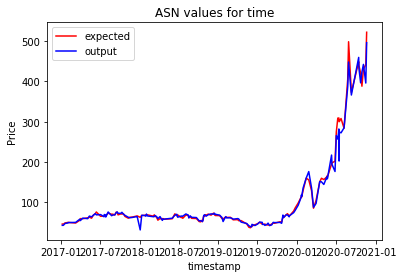

RMSE:  13.066652193261387
R2:  0.9848024886698735


22/06/21 17:44:34 WARN Instrumentation: [f49caf76] regParam is zero, which might cause numerical instability and overfitting.
22/06/21 17:44:34 WARN Instrumentation: [f49caf76] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


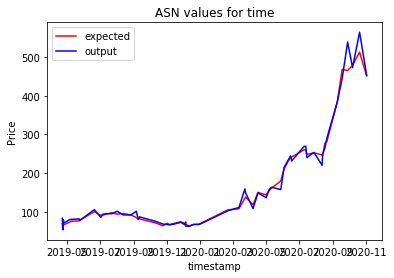

RMSE:  14.574312486508752
R2:  0.9858086714419537


In [9]:
for dataframe in all_datasets:
    trainDF, testDF = generate_train_test_data(dataframe)
    for model_type in [LinearRegression()]:
        predDF = test_model(model_type, trainDF, testDF)
        create_chart(predDF)

        # evaluate predictions
        regevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")
        print("RMSE: ", regevaluator.evaluate(predDF))
        r2 = regevaluator.setMetricName("r2").evaluate(predDF)
        print("R2: ", r2)